In [102]:
import pandas as pd
from pathlib import Path
from pandas import DataFrame
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'lines.linewidth': 1, 'axes.labelsize': 12, 'axes.titlesize': 12})

palette = ["#e36414", "#588157", "#0f4c5c"]
# Make Matplotlib plots appear inline
%matplotlib inline

In [103]:
results = Path('./slurm/results/')
sylvan_cudd_path = results / "229423" / "sylvan-cudd" 
sylvan_regression_path = results / "229422" / "sylvan-regression" 

def plot_unity(xdata, ydata, **kwargs):
    mn = min(xdata.min(), ydata.min())
    mx = max(xdata.max(), ydata.max())
    points = np.linspace(mn, mx, 100)
    plt.gca().plot(points, points, color='k', marker=None,
            linestyle='--', linewidth=1.0)

In [104]:
sylvan_regression_runtime = pd.read_csv(sylvan_regression_path / 'sylvan_regression_runtime.csv')
sylvan_regression_quality = pd.read_csv(sylvan_regression_path / 'sylvan_regression_quality.csv')

In [105]:
# sylvan_cudd_runtime.head()
# sylvan_cudd_quality.head()
# sylvan_regression_runtime.head()
sylvan_regression_quality.head()

,from_size,to_size,time,workers,nodes_threshold,max_growth,max_var,max_swap,reordering_trigger,model
0,4990,1547,0.071561,8,1,1.2,25,1000,sa,mult_bool_matrix_2_3_3
1,3456,2341,0.068116,8,1,1.2,25,1000,sa,mult_bool_matrix_2_3_3
2,4990,1547,0.072464,8,1,1.4,25,5000,sa,mult_bool_matrix_2_3_3
3,3456,2341,0.077501,8,1,1.4,25,5000,sa,mult_bool_matrix_2_3_3
4,4990,1547,0.076578,8,512,1.2,100,5000,sa,mult_bool_matrix_2_3_3


In [106]:
df = sylvan_cudd_quality
df = df.drop('workers', axis=1)
df = df.drop('nodes_threshold', axis=1)
df = df.drop('max_growth', axis=1)
df = df.drop('max_var', axis=1)
df = df.drop('max_swap', axis=1)

def derive_solver_type(row):
    if str(row["solver"]).__contains__("sylvan"):
        return "sylvan-sift"
    elif str(row["solver"]).__contains__("cudd"):
        if str(row["heuristic"]).__contains__("sift"):
            return "cudd-sift"
        elif str(row["heuristic"]).__contains__("group"):
            return "cudd-group"
    else:
        return "NaN"
        
df['solver_type'] = df.apply(derive_solver_type, axis=1)
m = df[df["reordering_trigger"] == "m"]
m_add = m[m["model"].str.contains('add', na = False)]
m_mult = m[m["model"].str.contains('mult', na = False)]

m_add = m_add.sort_values(by=['solver_type'])
m_mult = m_mult.sort_values(by=['solver_type'])

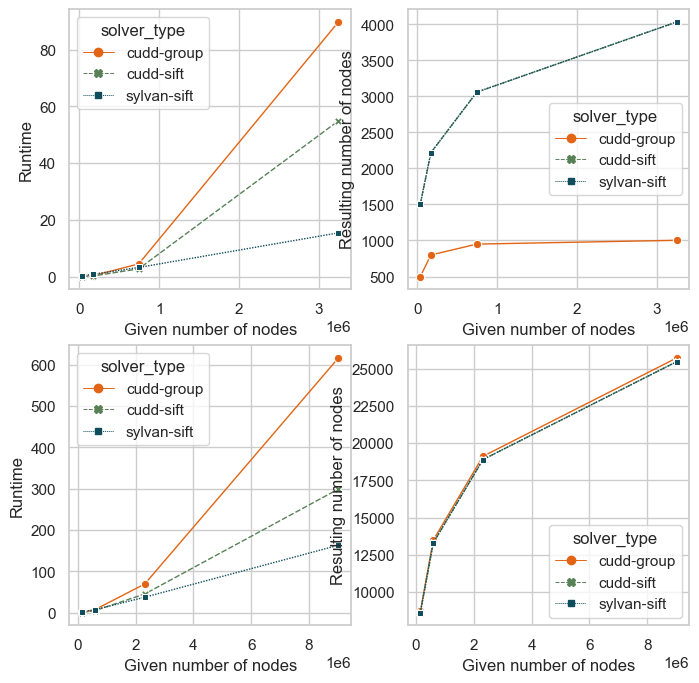

In [107]:
sns.set_theme(style='whitegrid')
sns.set_context("notebook", rc={"lines.linewidth": 0.7})
%matplotlib inline

fig, axes = plt.subplots(2, 2, figsize=(8, 8), dpi=100)

def add_line_plot(
    ax, data, 
    x="from_size", y="time", 
    xlabel="Given number of nodes", ylabel="Runtime", 
    hue="solver_type", style="solver_type"):
    
    g = sns.lineplot(ax=ax, 
                 x=x, 
                 y=y, 
                 data=data, 
                 hue=hue, 
                 style=style, 
                 markers=True, 
                 dashes=True, 
                 palette=palette,
                 legend="auto",
                 linewidth=1
    )
    ax.set(xlabel=xlabel, ylabel=ylabel)
    return g
    
a = add_line_plot(
    ax=axes[0, 0], 
    y="time", 
    ylabel="Runtime", 
    data=m_add)

b = add_line_plot(
    ax=axes[0, 1], 
    y="to_size", 
    ylabel="Resulting number of nodes", 
    data=m_add)

c = add_line_plot(
    ax=axes[1, 0], 
    y="time", 
    ylabel="Runtime", 
    data=m_mult)

d = add_line_plot(
    ax=axes[1, 1], 
    y="to_size", 
    ylabel="Resulting number of nodes", 
    data=m_mult)

plt.show()

In [108]:
matplotlib.use("pgf")
# %matplotlib inline
plt.figure(figsize=(4,4))

def lineplot(
    data, 
    x="from_size", y="time", 
    xlabel="Given number of nodes", ylabel="Runtime", 
    hue="solver_type", style="solver_type"):
    
    g = sns.lineplot(
                 x=x, 
                 y=y, 
                 data=data, 
                 hue=hue, 
                 style=style, 
                 markers=True, 
                 dashes=True, 
                 palette=palette,
                 legend="auto",
                 linewidth=1
    )
    g.set(xlabel=xlabel, ylabel=ylabel)
    return g

def save(figure, name):
    figure.savefig(name, dpi=75)

In [109]:
plt.clf()
lineplot(
    y="time", 
    ylabel="Runtime", 
    data=m_add)
save(plt, sylvan_cudd_path / 'sylvan-cudd-manual-runtime-add.pgf')
plt.clf()
lineplot(
    y="to_size", 
    ylabel="Resulting number of nodes", 
    data=m_add)
save(plt, sylvan_cudd_path / 'sylvan-cudd-manual-quality-add.pgf')
plt.clf()
lineplot(
    y="time", 
    ylabel="Runtime", 
    data=m_mult)
save(plt, sylvan_cudd_path / 'sylvan-cudd-manual-runtime-mult.pgf')
plt.clf()
lineplot(
    y="to_size", 
    ylabel="Resulting number of nodes", 
    data=m_mult)
save(plt, sylvan_cudd_path / 'sylvan-cudd-manual-quality-mult.pgf')

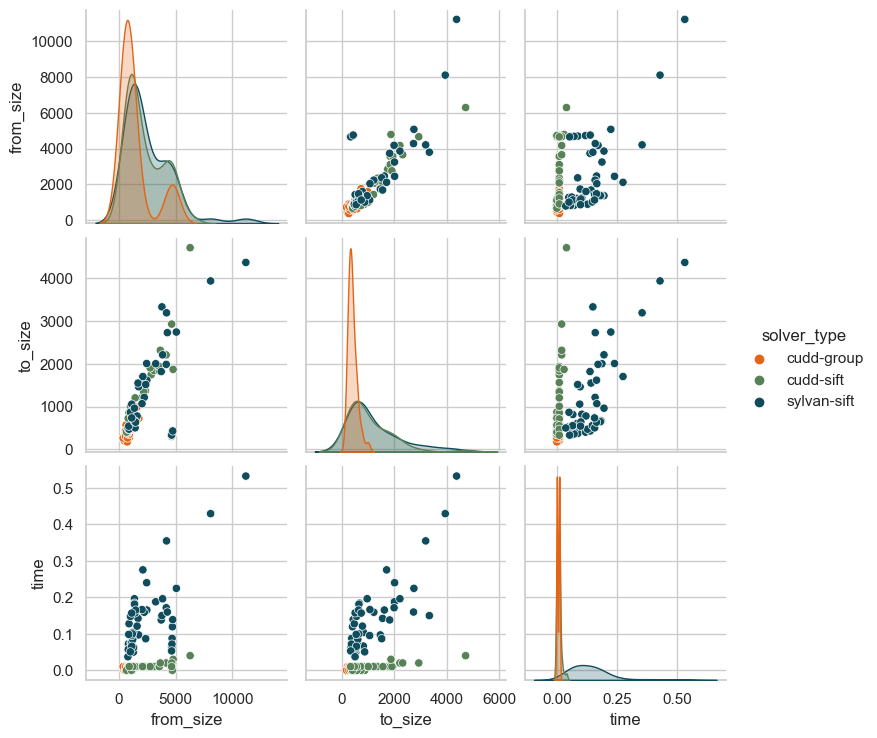

In [114]:
df = sylvan_cudd_quality
df = df.drop('workers', axis=1)
df = df.drop('nodes_threshold', axis=1)
df = df.drop('max_growth', axis=1)
df = df.drop('max_var', axis=1)
df = df.drop('max_swap', axis=1)

def derive_solver_type(row):
    if str(row["solver"]).__contains__("sylvan"):
        return "sylvan-sift"
    elif str(row["solver"]).__contains__("cudd"):
        if str(row["heuristic"]).__contains__("sift"):
            return "cudd-sift"
        elif str(row["heuristic"]).__contains__("group"):
            return "cudd-group"
    else:
        return "NaN"
        
df['solver_type'] = df.apply(derive_solver_type, axis=1)
sa = df[df["reordering_trigger"] == "sa"]
sa_add = sa[sa["model"].str.contains('add', na = False)]
sa_mult = sa[sa["model"].str.contains('mult', na = False)]

sa_add = sa_add.sort_values(by=['solver_type'])
sa_mult = sa_mult.sort_values(by=['solver_type'])

# min_invyr_per_plotcode = df.groupby('PlotCode', as_index=False)['model'].min()

sa_add.head()
sns.pairplot(sa_add, hue="solver_type", palette = palette)

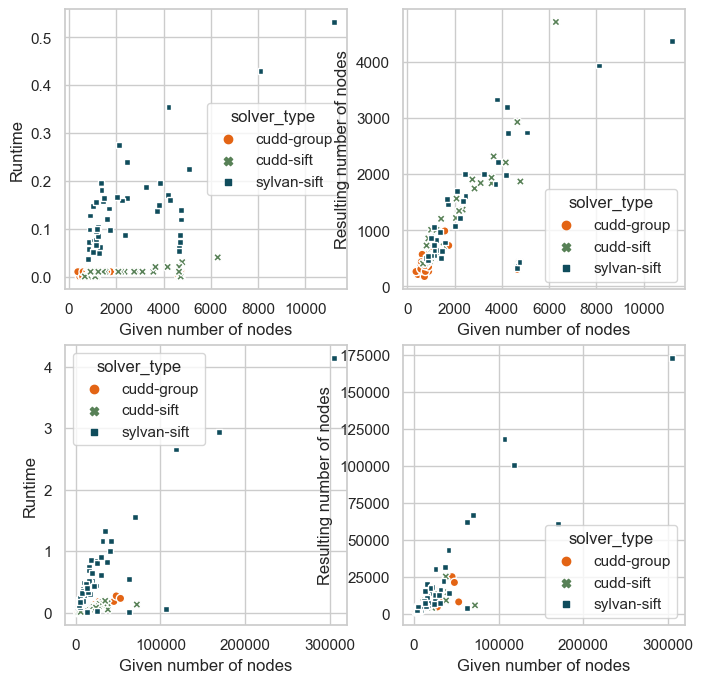

In [113]:
sns.set_theme(style='whitegrid')
sns.set_context("notebook", rc={"lines.linewidth": 0.7})
%matplotlib inline

fig, axes = plt.subplots(2, 2, figsize=(8, 8), dpi=100)

def add_line_plot(
    ax, data, 
    x="from_size", y="time", 
    xlabel="Given number of nodes", ylabel="Runtime", 
    hue="solver_type", style="solver_type"):
    
    g = sns.scatterplot(ax=ax, 
                 x=x, 
                 y=y, 
                 data=data, 
                 hue=hue, 
                 style=style, 
                 palette=palette,
                 legend="auto",
                 linewidth=1
    )
    ax.set(xlabel=xlabel, ylabel=ylabel)
    return g
    
a = add_line_plot(
    ax=axes[0, 0], 
    y="time", 
    ylabel="Runtime", 
    data=sa_add)

b = add_line_plot(
    ax=axes[0, 1], 
    y="to_size", 
    ylabel="Resulting number of nodes", 
    data=sa_add)

c = add_line_plot(
    ax=axes[1, 0], 
    y="time", 
    ylabel="Runtime", 
    data=sa_mult)

d = add_line_plot(
    ax=axes[1, 1], 
    y="to_size", 
    ylabel="Resulting number of nodes", 
    data=sa_mult)

plt.show()